In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
df= pd.read_csv('customer_churn_large_dataset.csv')
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
#checking if the data has any missing values.
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

This shows that the dataset has no missing values and its clean as well.

In [7]:
df.Churn.unique()

array([0, 1], dtype=int64)

In [8]:
df.Churn.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [9]:
df.mean()

CustomerID                    50000.500000
Age                              44.027020
Subscription_Length_Months       12.490100
Monthly_Bill                     65.053197
Total_Usage_GB                  274.393650
Churn                             0.497790
dtype: float64

In [10]:
df.duplicated().sum()

0

<AxesSubplot:>

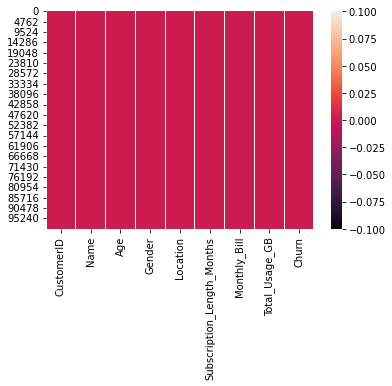

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [13]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [14]:
df.groupby('Location')['Churn'].value_counts()

Location     Churn
Chicago      0        10013
             1         9945
Houston      0        10258
             1         9899
Los Angeles  0        10161
             1         9880
Miami        1        10076
             0         9955
New York     1         9979
             0         9834
Name: Churn, dtype: int64

In [15]:
df.groupby(['Churn']).mean()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
Churn,,,,,
0,50132.291870,44.003305,12.474045,65.057453,274.762729
1,49867.537918,44.050945,12.506298,65.048903,274.021294


After grouping by criteria, it was found that customers who refused to provide services call the support service more often.

In [16]:
df['Monthly_Bill'].unique()

array([73.36, 48.76, 85.47, ..., 75.21, 41.98, 83.55])

In [17]:
df['Monthly_Bill'].nunique()

7001

In [18]:
for i in df.columns:
    print(df[i].value_counts)
    print("/n")

<bound method IndexOpsMixin.value_counts of 0             1
1             2
2             3
3             4
4             5
          ...  
99995     99996
99996     99997
99997     99998
99998     99999
99999    100000
Name: CustomerID, Length: 100000, dtype: int64>
/n
<bound method IndexOpsMixin.value_counts of 0             Customer_1
1             Customer_2
2             Customer_3
3             Customer_4
4             Customer_5
              ...       
99995     Customer_99996
99996     Customer_99997
99997     Customer_99998
99998     Customer_99999
99999    Customer_100000
Name: Name, Length: 100000, dtype: object>
/n
<bound method IndexOpsMixin.value_counts of 0        63
1        62
2        24
3        36
4        46
         ..
99995    33
99996    62
99997    64
99998    51
99999    27
Name: Age, Length: 100000, dtype: int64>
/n
<bound method IndexOpsMixin.value_counts of 0          Male
1        Female
2        Female
3        Female
4        Female
          ...  
9999

Data Visualization

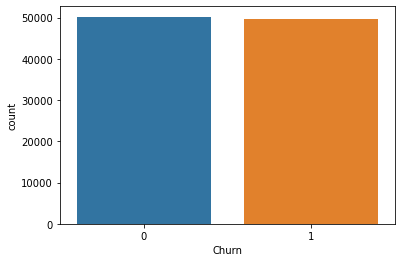

In [19]:
#let's check the proportion of each type ofChurn
sns.countplot(x='Churn',data=df)
plt.show()

We cannot see the any imblance in our dataset

We need to use other techniques to check now. 

In [20]:
data = df.dropna()

In [21]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

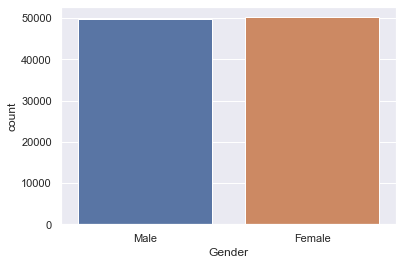

In [22]:
sns.set()
sns.countplot(x='Gender', data=df)

<AxesSubplot:xlabel='Subscription_Length_Months', ylabel='count'>

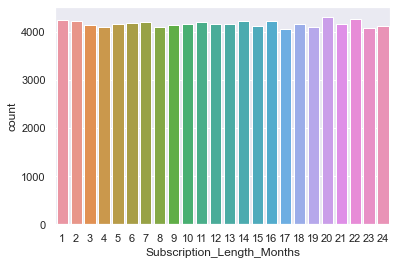

In [23]:
sns.set()
sns.countplot(x='Subscription_Length_Months', data=df)

Bivariate Analysis

<AxesSubplot:xlabel='CustomerID', ylabel='Churn'>

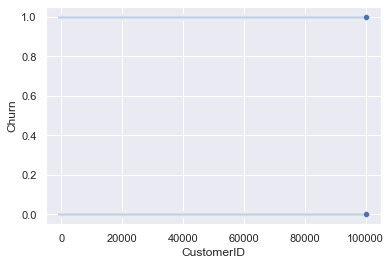

In [24]:
sns.scatterplot(data=df,x='CustomerID',y='Churn')

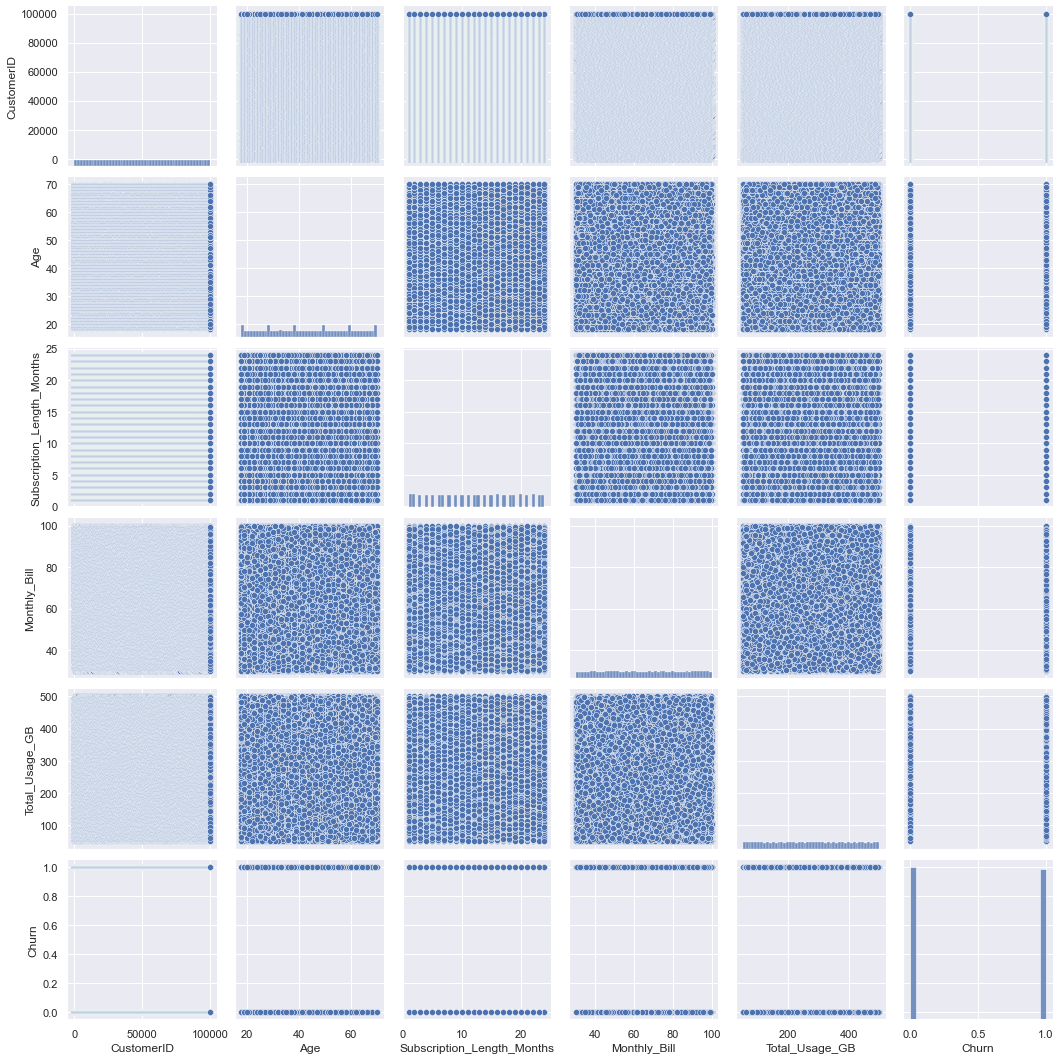

In [25]:
sns.pairplot(df)

In [26]:
df["Name"].head()

0    Customer_1
1    Customer_2
2    Customer_3
3    Customer_4
4    Customer_5
Name: Name, dtype: object

In [27]:
df["Gender"].head()

0      Male
1    Female
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [28]:
df["Location"].head()

0    Los Angeles
1       New York
2    Los Angeles
3          Miami
4          Miami
Name: Location, dtype: object

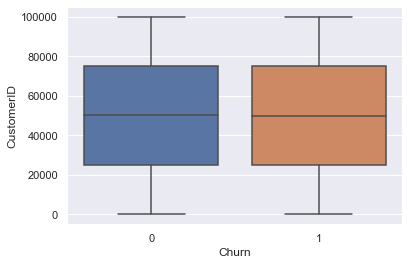

In [29]:
sns.boxplot(x = 'Churn', y = 'CustomerID', data = df, sym = "")
plt.show()

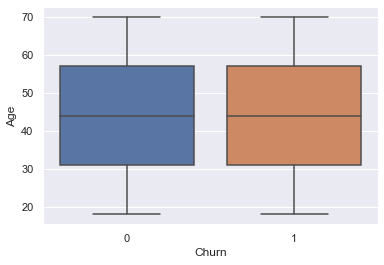

In [30]:
sns.boxplot(x = 'Churn', y = 'Age', data = df, sym = "")
plt.show()

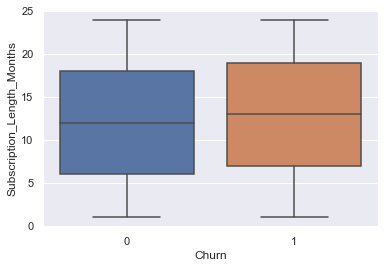

In [31]:
sns.boxplot(x = 'Churn', y = 'Subscription_Length_Months', data = df, sym = "")
plt.show()

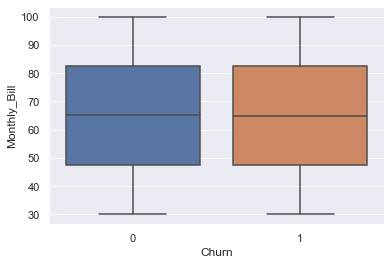

In [32]:
sns.boxplot(x = 'Churn', y = 'Monthly_Bill', data = df, sym = "")
plt.show()

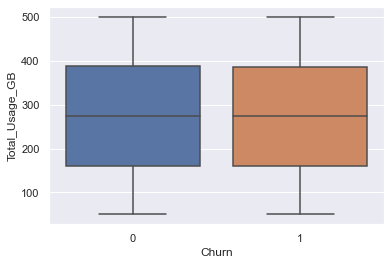

In [33]:
sns.boxplot(x = 'Churn', y = 'Total_Usage_GB', data = df, sym = "")
plt.show()

Checking skewness

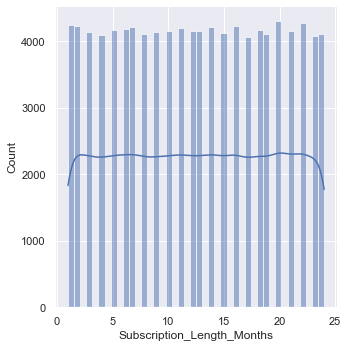

In [34]:
sns.displot(df['Subscription_Length_Months'], kde=True)

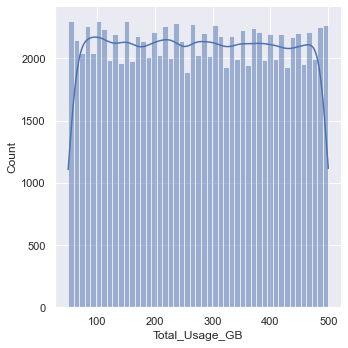

In [35]:
sns.displot(df['Total_Usage_GB'], kde=True)

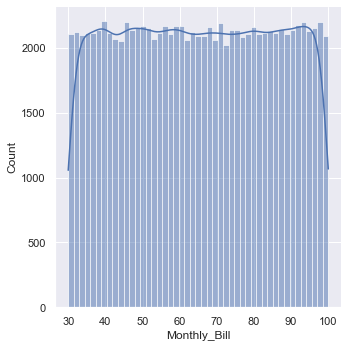

In [36]:
sns.displot(df['Monthly_Bill'], kde=True)

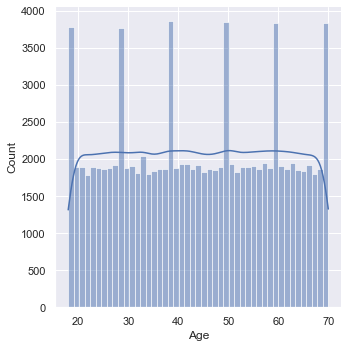

In [37]:
sns.displot(df['Age'], kde=True)

In [38]:
df = df.drop(['Name', 'Location', 'Gender'], axis=1)

In [39]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [40]:
correlation=df.corr()

<AxesSubplot:>

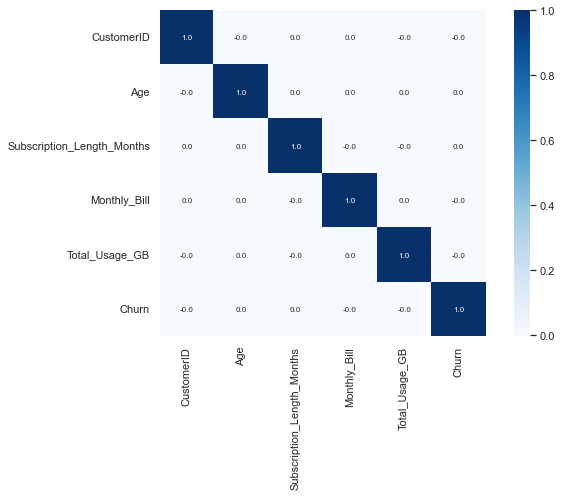

In [41]:
#constructing a heatmap to understand the correlation between the column
plt.figure(figsize=(10,6))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot = True, annot_kws={'size':8}, cmap='Blues')

Training the Model

In [42]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [43]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=2)

Solve scaling problem

In [44]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
print(x_train)
x_test = scaler.fit_transform(x_test)
print(x_test)

[[-0.53721906 -0.32781736  0.50600291 -0.96086642 -1.37727335]
 [-1.58027846  1.24300023 -0.50355114  1.40750235 -1.69169779]
 [ 0.02585914 -1.63683201 -1.36888317 -1.72013031 -0.72541782]
 ...
 [ 1.58475026  0.91574656 -1.36888317 -0.60499241  0.35589548]
 [ 0.76579986  1.24300023 -0.21510712 -0.40107017 -1.44629335]
 [ 1.35752382 -1.70228275 -0.50355114  0.98728394 -0.76376226]]
[[-1.50023658  0.9746968  -1.66513638 -0.35572555 -1.38156382]
 [ 0.03258526  0.32050934 -0.79519704  1.29271577  0.63035864]
 [-1.69547799 -1.70747181  1.08967151 -0.33212018  1.06640267]
 ...
 [ 1.48372729  1.04011555  0.94468162 -1.69680534  0.92105466]
 [-0.46477093 -1.64205306 -0.65020716  1.45549444 -1.48101246]
 [ 0.8180213  -0.39909688  0.65470184 -0.01984087 -1.17501665]]


Now the variables are scaled in one dimensional grid, which has a positive effect on the quality of the model.

Supervised ML for the Classification problem:

In [46]:
a=LogisticRegression()

In [47]:
a.fit(x_train, y_train)

LogisticRegression()

In [48]:
x_test_prediction=a.predict(x_test)
test_data_accuracy= accuracy_score(x_test_prediction, y_test)

In [49]:
print('Accuracy : ',test_data_accuracy)

Accuracy :  0.5007


In [50]:
b=RandomForestClassifier()

In [51]:
b.fit(x_train, y_train)

RandomForestClassifier()

In [52]:
x_test_prediction=b.predict(x_test)
test_data_accuracy= accuracy_score(x_test_prediction, y_test)

In [53]:
print('Accuracy : ',test_data_accuracy)

Accuracy :  0.50025


Model Evaluation

In [54]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [55]:
a_pred = a.predict(x_test)
confusion_matrix(y_test, a_pred)

array([[7338, 2715],
       [7271, 2676]], dtype=int64)

In [56]:
b_pred = b.predict(x_test)
confusion_matrix(y_test, b_pred)

array([[5242, 4811],
       [5184, 4763]], dtype=int64)

In [57]:
print('For Linear Regressor Classifier Tree Classifier')
print('Recall score: ', recall_score(y_test, a_pred))
print('Precision score: ', precision_score(y_test, a_pred))

For Linear Regressor Classifier Tree Classifier
Recall score:  0.26902583693575954
Precision score:  0.49638286032276013


In [58]:
print('For Linear Regressor Classifier Tree Classifier')
print('Recall score: ', recall_score(y_test, b_pred))
print('Precision score: ', precision_score(y_test, b_pred))

For Linear Regressor Classifier Tree Classifier
Recall score:  0.47883784055494116
Precision score:  0.4974932107791937


As we can see, the Random Forest method showed a good result.

ROC curve

In [59]:
y_pred_prob_lr = a.predict_proba(x_test)[:, 1]

In [60]:
y_pred_prob_rf = b.predict_proba(x_test)[:, 1]

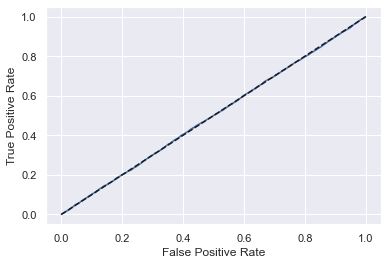

In [61]:
#calculate the roc metrics Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

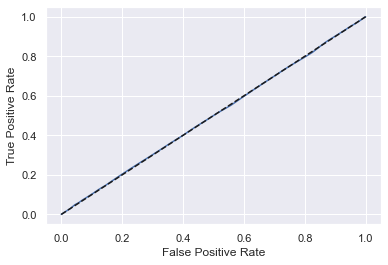

In [62]:
#calculate the roc metrics for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [63]:
print('For Linear Regressor Classifier Tree Classifier')
print(f1_score(y_test, a_pred))

For Linear Regressor Classifier Tree Classifier
0.3489372799582736


In [64]:
print('For Random Forest Classifier')
print(f1_score(y_test, b_pred))

For Random Forest Classifier
0.4879872957328006


The obtained values ​​of the metric f1 are a sign of the good efficiency of the model even in the situation of class imbalance. So the best method is .Random Forest Classifier.

Grid search in sklearn

In [65]:
model = RandomForestClassifier(n_estimators = 120, 
                               max_features = 'sqrt', 
                               max_depth = None, 
                               criterion = 'gini', 
                               random_state = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.50055

Feature importances

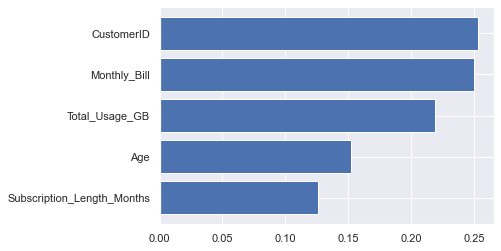

In [66]:
#calculating feature importances
importances = model.feature_importances_
sorted_index = np.argsort(importances)
labels = x.columns[sorted_index]

plt.clf()
plt.barh(range(x.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

Thus, the best method for solving the Churn Classification Problem is the Random Forest method. The accuracy metric is not informative due to class imbalance. Precision, Recall, F1 metrics are important to confirm this conclusion.